In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
# Importing common classification models from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier

# Importing XGBoost classifier
from xgboost import XGBClassifier

# Importing neural network models from Keras and TensorFlow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Input
from scikeras.wrappers import KerasClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import shap
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("Telco-Customer-Churn.csv")

In [6]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
data.rename(columns = {'customerID':'CustomerID','gender':'Gender','tenure':'Tenure'}, inplace = True)

In [10]:
data

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [7]:
cat_col = []
num_col = []

for column in data.columns:
    unique_value = data[column].nunique()
    if unique_value <= 5:
        cat_col.append(column) 
    else: num_col.append(column)

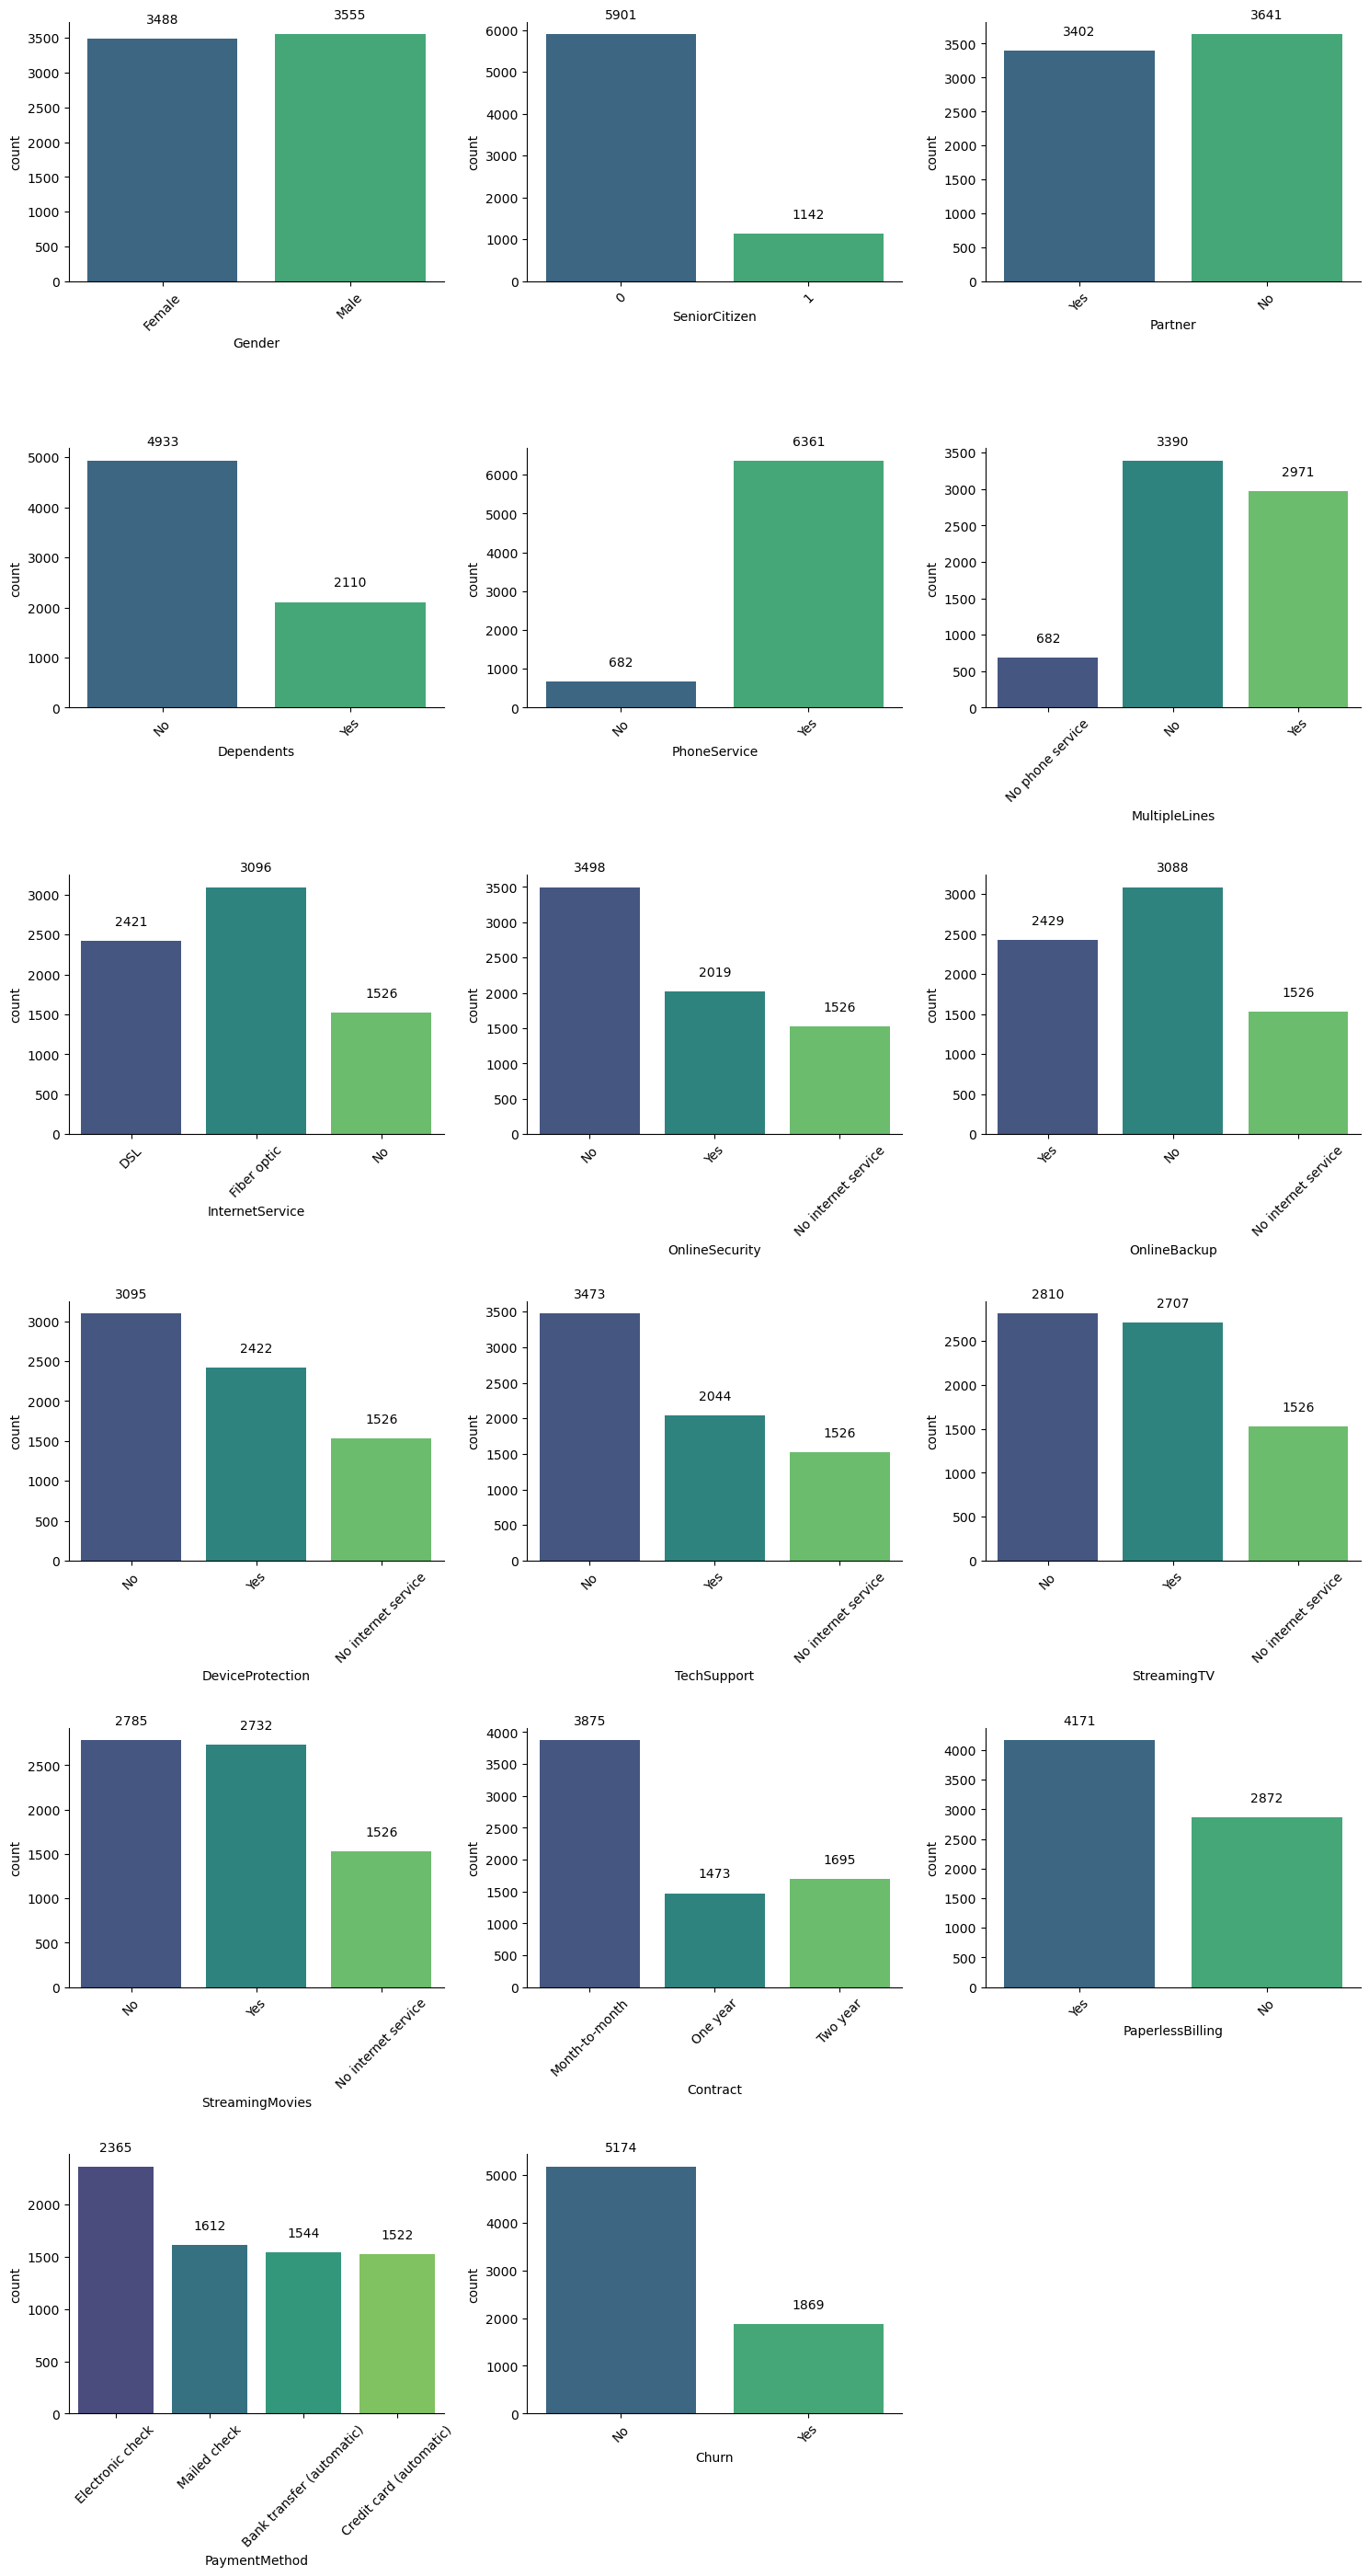

In [9]:
plt.figure(figsize=(15, 45))
plot_num = 1

# Generate count plots with values on bars
for col in cat_col:
    plt.subplot(10, 3, plot_num)
    ax = sns.countplot(data=data, x=col,hue=col, palette='viridis', legend=False)
    plt.xticks(rotation=45)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # Add values on bars
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 15), 
                    textcoords = 'offset points')
    
    plot_num += 1
    plt.tight_layout()

plt.show()

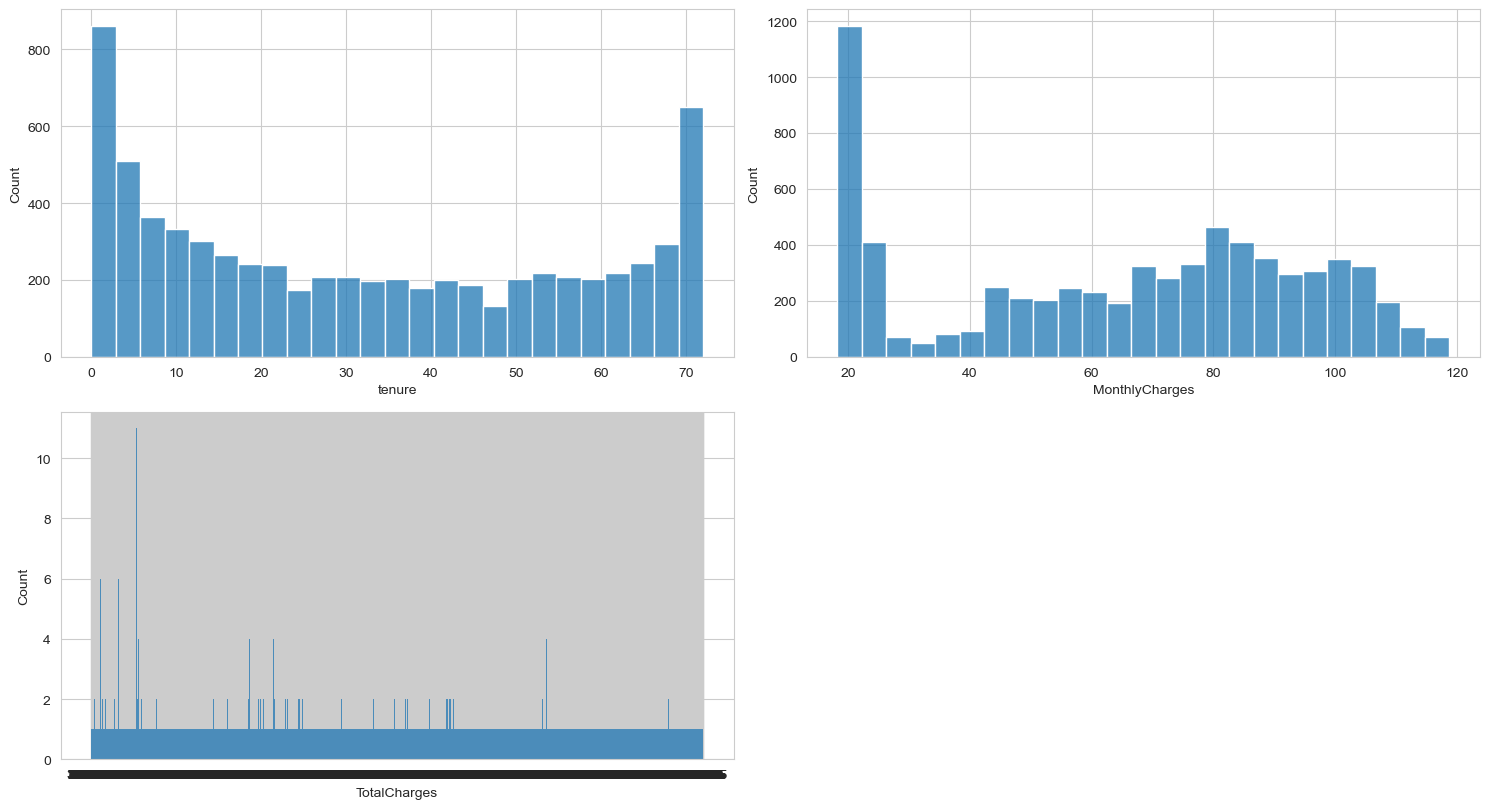

In [65]:
plt.figure(figsize=(15,40))
plot_num = 1
for col in num_col:
    plt.subplot(10,2,plot_num)
    sns.histplot(data=data, x=col,bins=25)
    plot_num += 1
    plt.tight_layout()

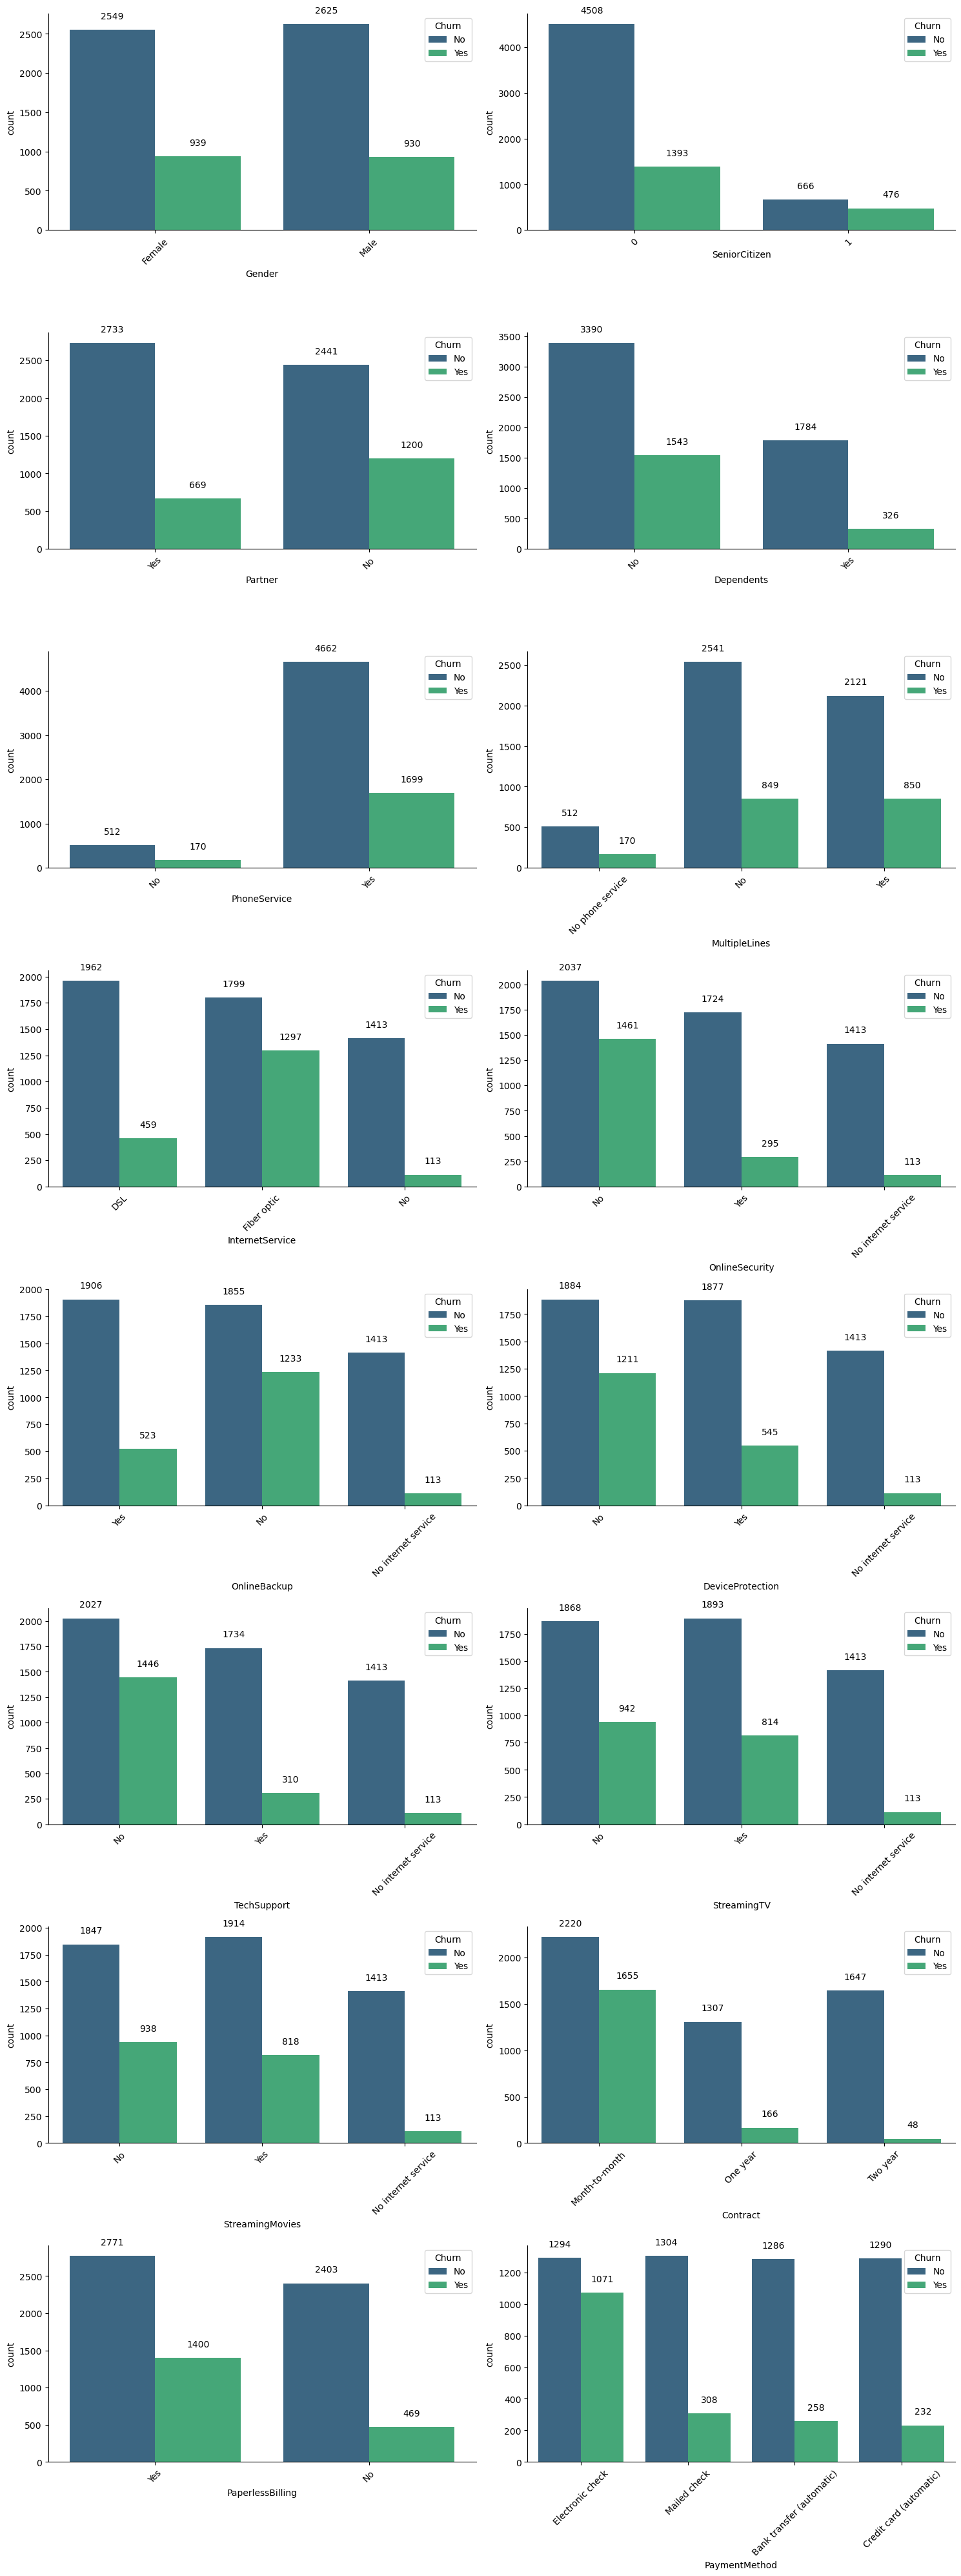

In [11]:
# Initialize the plot figure
plt.figure(figsize=(15, 40))
plot_num = 1

# Calculate the number of rows needed for subplots
num_plots = len([col for col in cat_col if data[col].nunique() <= 4 and col != "Churn"])
rows = (num_plots // 2) + (num_plots % 2)

# Generate count plots with values on bars
for col in cat_col:
    if data[col].nunique() <= 4 and col != "Churn":
        plt.subplot(rows, 2, plot_num)
        ax = sns.countplot(data=data, x=col, hue="Churn", palette="viridis")
        plt.xticks(rotation=45)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        
        # Add values on bars
        for p in ax.patches:
            height = p.get_height()
            if height > 0:  # Only annotate if height is greater than zero
                ax.annotate(format(height, '.0f'), 
                            (p.get_x() + p.get_width() / 2., height), 
                            ha='center', va='center', 
                            xytext=(0, 15), 
                            textcoords='offset points')
        
        plot_num += 1
        plt.tight_layout()

plt.show()


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        7043 non-null   object 
 1   Gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   Tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [13]:
label_encoder = LabelEncoder()

for column in data.columns:
    if data[column].dtype == 'object':  # Check if the column is of object type (categorical)
        data[column] = label_encoder.fit_transform(data[column])

data


,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,2505,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1466,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,157,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1400,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4853,1,0,1,1,24,1,2,0,2,...,2,2,2,2,1,1,3,84.80,1597,0
7039,1525,0,0,1,1,72,1,2,1,0,...,2,0,2,2,1,1,1,103.20,5698,0
7040,3367,0,0,1,1,11,0,1,0,2,...,0,0,0,0,0,1,2,29.60,2994,0
7041,5934,1,1,1,0,4,1,2,1,0,...,0,0,0,0,0,1,3,74.40,2660,1


In [22]:
data.corr()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
CustomerID,1.000000,0.006288,-0.002074,-0.026729,-0.012823,0.008035,-0.006483,0.004316,-0.012407,0.013292,...,-0.006918,0.001140,-0.007777,-0.016746,0.015028,-0.001945,0.011604,-0.003916,0.003027,-0.017447
Gender,0.006288,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,...,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,-0.005291,-0.008612
SeniorCitizen,-0.002074,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,...,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.037653,0.150889
Partner,-0.026729,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,...,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.059568,-0.150448
Dependents,-0.012823,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,...,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,-0.009572,-0.164221
Tenure,0.008035,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,...,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.158523,-0.352229
PhoneService,-0.006483,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,...,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.083195,0.011942
MultipleLines,0.004316,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,...,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.114955,0.038037
InternetService,-0.012407,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,...,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.055724,-0.047291
OnlineSecurity,0.013292,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,...,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.042357,-0.289309


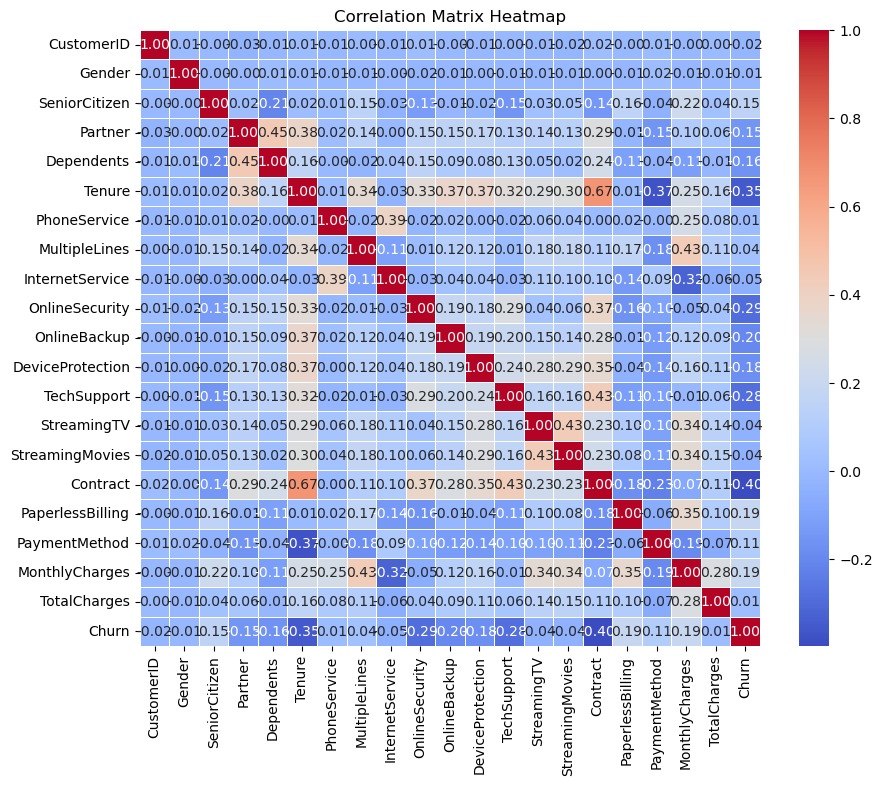

In [24]:
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))  
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)  
plt.title('Correlation Matrix Heatmap')
plt.show()


In [26]:
data.duplicated().sum()

0

In [15]:
# Class distribution
class_distribution = data['Churn'].value_counts()
class_distribution

Churn
0    5174
1    1869
Name: count, dtype: int64

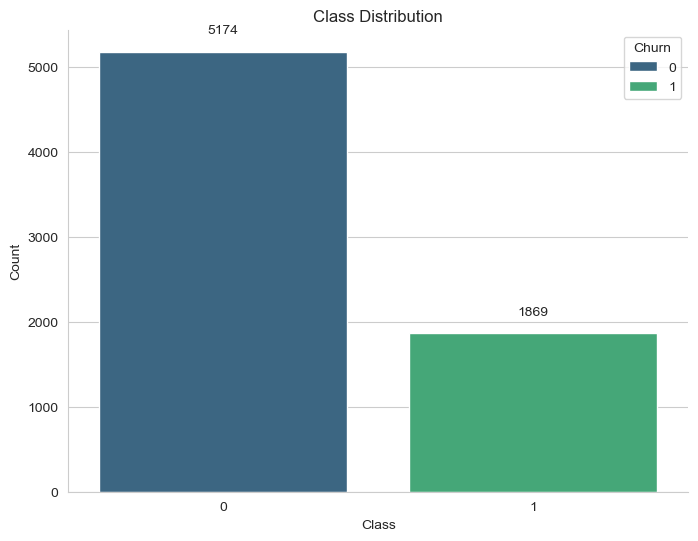

In [518]:
# Set the aesthetic style of the plots

sns.set_style('whitegrid')

# Create bar plot for class distribution
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=data, x='Churn', hue='Churn', palette='viridis', dodge=False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add titles and labels
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')

# Add values on bars
for p in ax.patches:
            height = p.get_height()
            if height > 0:  # Only annotate if height is greater than zero
                ax.annotate(format(height, '.0f'), 
                            (p.get_x() + p.get_width() / 2., height), 
                            ha='center', va='center', 
                            xytext=(0, 15), 
                            textcoords='offset points')
        

# Show plot
plt.show()


In [32]:
minority_class_count = class_distribution.min() 
majority_class_count = class_distribution.max() 
imbalance_ratio = majority_class_count / minority_class_count 
print(f'Imbalance Ratio: {imbalance_ratio}')

Imbalance Ratio: 2.7683253076511503


In [17]:
X = data.drop("Churn", axis = 1)
y = data["Churn"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
smote = SMOTE(random_state=42) 
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

In [21]:
scaler = StandardScaler() 
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.transform(X_test)

## Define Models the models to be tested:

In [40]:
def create_keras_model():
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))  # Adding Input layer
    model.add(Dense(12, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

models = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(probability=True),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gaussian Naive Bayes': GaussianNB(),
    'XGBoost': XGBClassifier(),
    'Neural Network': KerasClassifier(build_fn=create_keras_model, epochs=150, batch_size=10, verbose=0)
}


In [42]:
results = {}

for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, "predict_proba") else None
    
    results[model_name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1 Score': f1_score(y_test, y_pred, average='weighted'),
        'ROC AUC': roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else 'N/A'
    }

# Display results
results = pd.DataFrame(results).T
results.sort_values(by='Accuracy',ascending=False)
results

,Accuracy,Precision,Recall,F1 Score,ROC AUC
Logistic Regression,0.814762,0.806610,0.814762,0.808307,0.860636
K-Nearest Neighbors,0.772889,0.764732,0.772889,0.767893,0.776777
Support Vector Machine,0.799148,0.786981,0.799148,0.787264,0.822233
Decision Tree,0.713272,0.715248,0.713272,0.714237,0.635164
Random Forest,0.800568,0.788994,0.800568,0.789857,0.843945
Gradient Boosting,0.809084,0.799339,0.809084,0.800571,0.860189
AdaBoost,0.806246,0.798128,0.806246,0.800389,0.856927
Gaussian Naive Bayes,0.759404,0.803854,0.759404,0.770939,0.844677
XGBoost,0.789212,0.781180,0.789212,0.784010,0.832634
Neural Network,0.790632,0.782678,0.790632,0.785465,0.832908


## Confusion Matrix

In [524]:
for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix for {name}:\n") 
    print(f'TN: {cm[0, 0]} FP: {cm[0, 1]}') 
    print(f'FN: {cm[1, 0]} TP: {cm[1, 1]}') 
    print()
    
#TN: True Negative
#FP: False Positive
#FN: False Negative
#TP: True Positive

Confusion Matrix for Logistic Regression:

TN: 940 FP: 96
FN: 165 TP: 208

Confusion Matrix for K-Nearest Neighbors:

TN: 899 FP: 137
FN: 183 TP: 190

Confusion Matrix for Support Vector Machine:

TN: 948 FP: 88
FN: 195 TP: 178

Confusion Matrix for Decision Tree:

TN: 841 FP: 195
FN: 196 TP: 177

Confusion Matrix for Random Forest:

TN: 943 FP: 93
FN: 187 TP: 186

Confusion Matrix for Gradient Boosting:

TN: 944 FP: 92
FN: 177 TP: 196

Confusion Matrix for AdaBoost:

TN: 930 FP: 106
FN: 167 TP: 206

Confusion Matrix for Gaussian Naive Bayes:

TN: 782 FP: 254
FN: 85 TP: 288

Confusion Matrix for XGBoost:

TN: 913 FP: 123
FN: 174 TP: 199

Confusion Matrix for Neural Network:

TN: 933 FP: 103
FN: 191 TP: 182



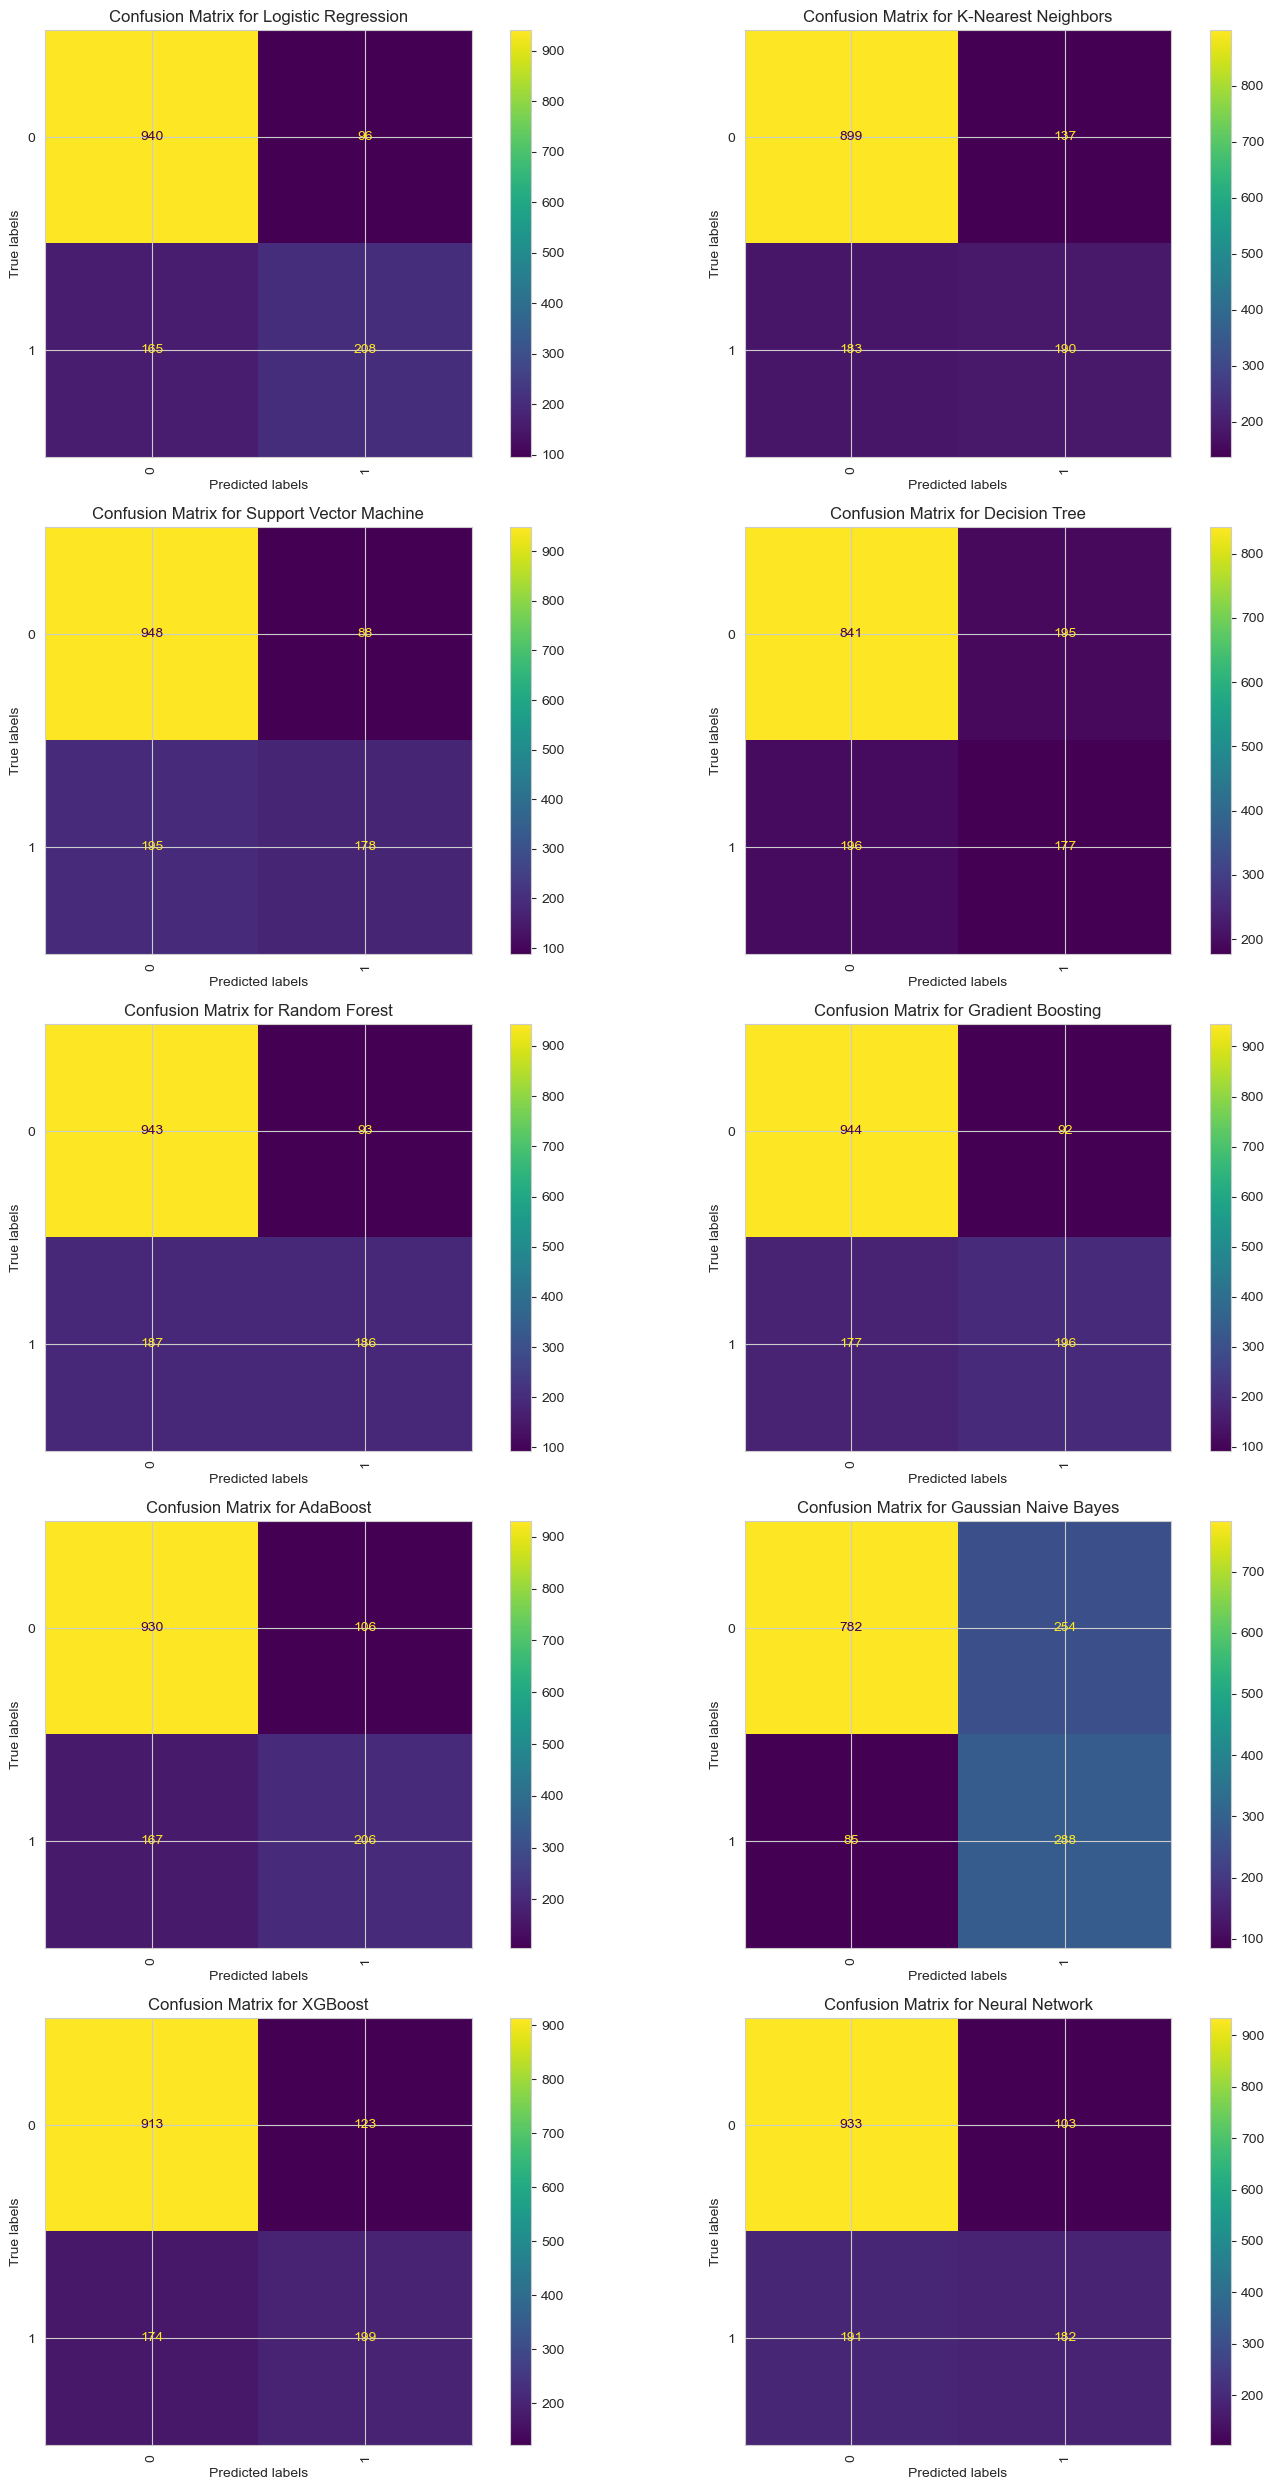

In [46]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 25))

# Flatten axes array for easy indexing
axes = axes.flatten()

# Train and plot confusion matrices for each model
for idx, (model_name, model) in enumerate(models.items()):
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=axes[idx], xticks_rotation='vertical')
    axes[idx].set_title(f'Confusion Matrix for {model_name}')
    axes[idx].set_xlabel('Predicted labels')
    axes[idx].set_ylabel('True labels')

# Adjust layout
plt.tight_layout()
plt.show()


In [48]:
top_models = ['Logistic Regression', 'Gradient Boosting']

confusion_matrices = {}

for model_name in top_models:
    model = models[model_name]
    cm = confusion_matrix(y_test, model.predict(X_test_scaled))
    confusion_matrices[model_name] = cm

# Display the confusion matrices
for model_name, cm in confusion_matrices.items(): 
    print(f'Confusion Matrix for {model_name}:') 
    print(f'TN: {cm[0, 0]} FP: {cm[0, 1]}') 
    print(f'FN: {cm[1, 0]} TP: {cm[1, 1]}') 
    print()
    
#TN: True Negative
#FP: False Positive
#FN: False Negative
#TP: True Positive

Confusion Matrix for Logistic Regression:
TN: 940 FP: 96
FN: 165 TP: 208

Confusion Matrix for Gradient Boosting:
TN: 944 FP: 92
FN: 177 TP: 196



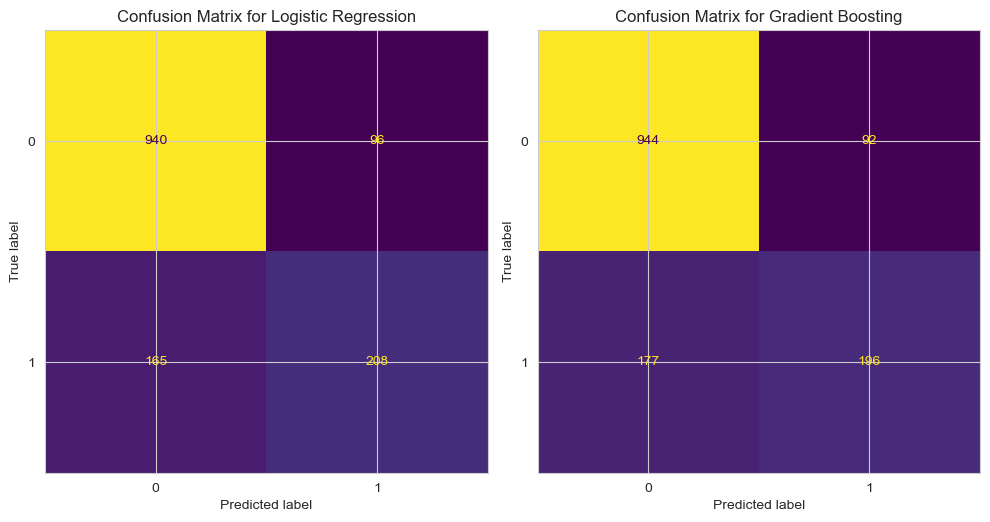

In [50]:
plt.figure(figsize=(10, 5))

for i, model_name in enumerate(top_models):
    model = models[model_name]
    cm = confusion_matrix(y_test, model.predict(X_test_scaled))
    plt.subplot(1, 2, i + 1)  # 1x2 grid for 2 plots
    ConfusionMatrixDisplay(cm).plot(ax=plt.gca(), colorbar=False)
    plt.title(f'Confusion Matrix for {model_name}')


plt.tight_layout()
plt.show()


# Hyperparameter Tuning

In [58]:
def evaluate_model(model,X_train,y_train,X_test,y_test):
        #model_name = 
        model.fit(X_train_scaled, y_train)  # Fit the model
        y_pred = model.predict(X_test_scaled)
        y_pred_proba = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, "predict_proba") else None
    
    
        Accuracy = accuracy_score(y_test, y_pred)
        Precision = precision_score(y_test, y_pred, average='weighted')
        Recall = recall_score(y_test, y_pred, average='weighted')
        F1_Score = f1_score(y_test, y_pred, average='weighted')
        ROC_AUC = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else 'N/A'

        model_name = type(model).__name__
        print(f"Results for {model_name}:") 
        print(f"Accuracy: {Accuracy}") 
        print(f"Precision: {Precision}") 
        print(f"Recall: {Recall}") 
        print(f"F1 Score: {F1_Score}") 
        print(f"ROC AUC: {ROC_AUC}") 
        print("\n")


In [60]:
best_models = {
    'Logistic Regression': best_params_lr,
    'Gradient Boosting': best_params_gb
}

def evaluate_models(models, X_train, y_train, X_test, y_test):
    for model_name, model in models.items():
        model.fit(X_train, y_train)  # Fit the model
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
        
        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else 'N/A'
        
        # Print results with model name
        print(f"Results for {model_name}:")
        print(f"Accuracy: {accuracy}")
        print(f"Precision: {precision}")
        print(f"Recall: {recall}")
        print(f"F1 Score: {f1}")
        print(f"ROC AUC: {roc_auc}")
        print("\n")

# Assuming X_train_scaled, y_train, X_test_scaled, and y_test are defined
evaluate_models(best_models, X_train_scaled, y_train, X_test_scaled, y_test)


Results for Logistic Regression:
Accuracy: 0.8147622427253371
Precision: 0.8066101445965962
Recall: 0.8147622427253371
F1 Score: 0.8083074195436707
ROC AUC: 0.86064674402476


Results for Gradient Boosting:
Accuracy: 0.808374733853797
Precision: 0.7978351171980657
Recall: 0.808374733853797
F1 Score: 0.7979543199403281
ROC AUC: 0.8619639363607191




## LogisticRegression - GridSearchCV and Filter

In [64]:
# Define the parameter grid for LogisticRegression
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Create a GridSearchCV object
grid_search_lr = GridSearchCV(LogisticRegression(), param_grid_lr, cv=5, scoring='accuracy')
grid_search_lr.fit(X_train_scaled, y_train)
best_params_lr = grid_search_lr.best_params_ 
print("Best parameters for Logistic Regression:", best_params_lr)

Best parameters for Logistic Regression: {'C': 1, 'penalty': 'l2', 'solver': 'saga'}


In [23]:
best_params_lr = grid_search_lr.best_params_ 
best_params_lr = LogisticRegression(C=1, penalty='l2', solver='saga')

In [479]:
evaluate_model(best_params_lr,X_train_scaled,y_train,X_test_scaled,y_test)

Results for LogisticRegression:
Accuracy: 0.8147622427253371
Precision: 0.8066101445965962
Recall: 0.8147622427253371
F1 Score: 0.8083074195436707
ROC AUC: 0.86064674402476




In [31]:
best_params_lr.fit(X_train_scaled, y_train)

LogisticRegression(C=1, solver='saga')

In [33]:
coefficients = best_params_lr.coef_[0]
odds_ratios = np.exp(coefficients)


# Display feature importance using coefficients and odds ratios
feature_importance_lr = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients,
    'Odds_Ratio': odds_ratios
})
print("\nFeature Importance (Coefficient and Odds Ratio):")
print(feature_importance_lr.sort_values(by='Coefficient', ascending=False))


Feature Importance (Coefficient and Odds Ratio):
             Feature  Coefficient  Odds_Ratio
18    MonthlyCharges     0.800553    2.226771
8    InternetService     0.188646    1.207614
16  PaperlessBilling     0.169250    1.184416
19      TotalCharges     0.111797    1.118286
7      MultipleLines     0.081224    1.084613
2      SeniorCitizen     0.067931    1.070291
17     PaymentMethod     0.067496    1.069826
14   StreamingMovies     0.039425    1.040212
3            Partner     0.030902    1.031384
13       StreamingTV    -0.003309    0.996697
1             Gender    -0.024874    0.975432
0         CustomerID    -0.030444    0.970015
11  DeviceProtection    -0.061042    0.940784
4         Dependents    -0.086263    0.917353
10      OnlineBackup    -0.121644    0.885464
12       TechSupport    -0.207446    0.812657
9     OnlineSecurity    -0.240320    0.786376
6       PhoneService    -0.300215    0.740659
15          Contract    -0.612831    0.541815
5             Tenure    -0.817

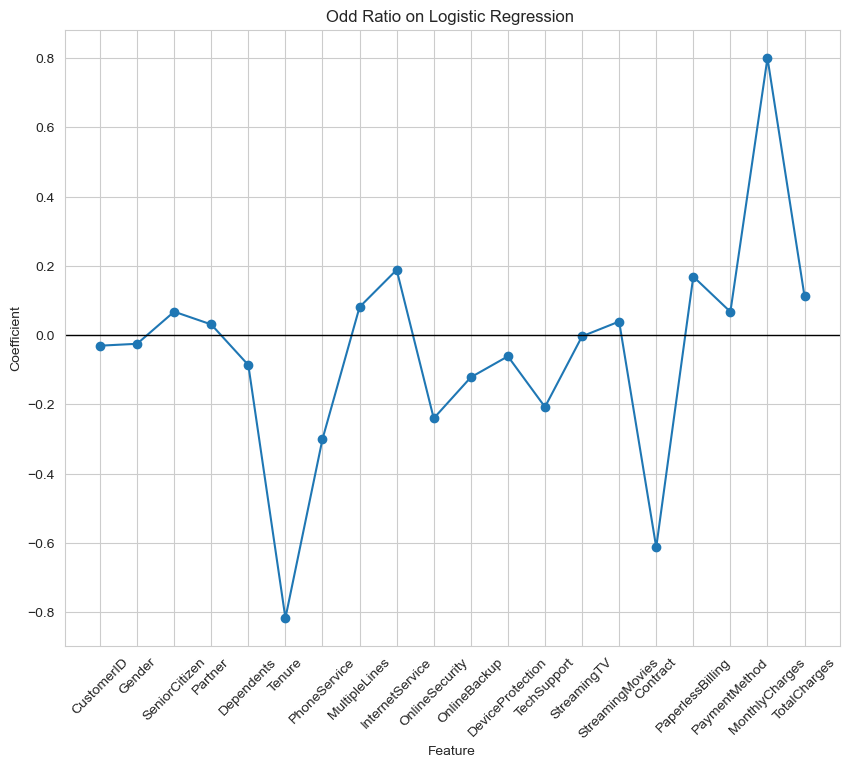

In [286]:
plt.figure(figsize = (10,8))
plt.plot(feature_importance['Feature'],feature_importance['Coefficient'],marker='o', linestyle='-')
plt.axhline(y=0.0, color='black', linestyle='-', linewidth=1)
plt.xlabel('Feature')
plt.xticks(rotation=45)
plt.ylabel('Coefficient')
plt.title('Odd Ratio on Logistic Regression ')
plt.grid(True) 
plt.show()

In [35]:
important_features_lr = []

for _, rows in feature_importance_lr.iterrows():
    if rows['Odds_Ratio'] > 1:
        important_features_lr.append(rows['Feature'])
        print(rows['Feature'])

SeniorCitizen
Partner
MultipleLines
InternetService
StreamingMovies
PaperlessBilling
PaymentMethod
MonthlyCharges
TotalCharges


In [37]:
filtered_X_train_lr = X_train[important_features_lr].reset_index(drop = True)
filtered_X_test_lr = X_test[important_features_lr].reset_index(drop = True)

In [483]:
evaluate_model(best_params_lr,filtered_X_train_lr,y_train,filtered_X_test_lr,y_test)

Results for LogisticRegression:
Accuracy: 0.8147622427253371
Precision: 0.8066101445965962
Recall: 0.8147622427253371
F1 Score: 0.8083074195436707
ROC AUC: 0.86064674402476




## GradientBoostingClassifier - GridSearchCV and Filter

In [54]:
# Define the parameter grid for GradientBoostingClassifier
param_grid_gb = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.5],
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object
grid_search_gb = GridSearchCV(GradientBoostingClassifier(), param_grid_gb, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the data
grid_search_gb.fit(X_train_scaled, y_train)

# Get the best parameters
best_params_gb = grid_search_gb.best_params_
print("Best parameters for Gradient Boosting:", best_params_gb)


Best parameters for Gradient Boosting: {'learning_rate': 0.05, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}


In [27]:
best_params_gb = GradientBoostingClassifier(learning_rate=0.05, max_depth=3, min_samples_leaf=1, min_samples_split=10,n_estimators=100)

In [39]:
best_params_gb.fit(X_train_scaled, y_train)

GradientBoostingClassifier(learning_rate=0.05, min_samples_split=10)

In [84]:
best_models = {
    'Logistic Regression': best_params_lr,
    'Gradient Boosting': best_params_gb
}

results_lr_gb = {}

for model_name, model in best_models.items():
    model.fit(X_train_scaled, y_train)  # Fit the model
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, "predict_proba") else None
    
    results_lr_gb[model_name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1 Score': f1_score(y_test, y_pred, average='weighted'),
        'ROC AUC': roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else 'N/A'
    }

# Display results
results_lr_gb = pd.DataFrame(results_lr_gb).T
results_lr_gb = results_lr_gb.sort_values(by='Accuracy', ascending=False)
print(results_lr_gb)


                     Accuracy  Precision    Recall  F1 Score   ROC AUC
Logistic Regression  0.814762   0.806610  0.814762  0.808307  0.860644
Gradient Boosting    0.808375   0.797835  0.808375  0.797954  0.861964


In [473]:
evaluate_model(best_params_gb,X_train_scaled,y_train,X_test_scaled,y_test)

Results for GradientBoostingClassifier:
Accuracy: 0.808374733853797
Precision: 0.7978351171980657
Recall: 0.808374733853797
F1 Score: 0.7979543199403281
ROC AUC: 0.8619639363607191




In [41]:
explainer = shap.TreeExplainer(best_params_gb, X_train_scaled)
SHAP_Values = explainer(X_train_scaled)

In [45]:
shap_values = pd.DataFrame({ 'Feature':X.columns, 
                               'SHAP_Values': np.abs(SHAP_Values.values).mean(axis=0) }).sort_values(by='SHAP_Values', ascending=False)
print("DataFrame for SHAP Values:") 
print(shap_values.sort_values(by='SHAP_Values', ascending=False))

DataFrame for SHAP Values:
             Feature  SHAP_Values
15          Contract     0.668120
5             Tenure     0.392432
18    MonthlyCharges     0.294124
9     OnlineSecurity     0.214589
12       TechSupport     0.169225
10      OnlineBackup     0.099207
16  PaperlessBilling     0.087844
17     PaymentMethod     0.078163
19      TotalCharges     0.061254
7      MultipleLines     0.059639
14   StreamingMovies     0.057524
2      SeniorCitizen     0.047459
8    InternetService     0.033482
0         CustomerID     0.029198
13       StreamingTV     0.017121
11  DeviceProtection     0.012547
6       PhoneService     0.003379
4         Dependents     0.002599
1             Gender     0.000000
3            Partner     0.000000


Text(0, 0.5, 'Feature')

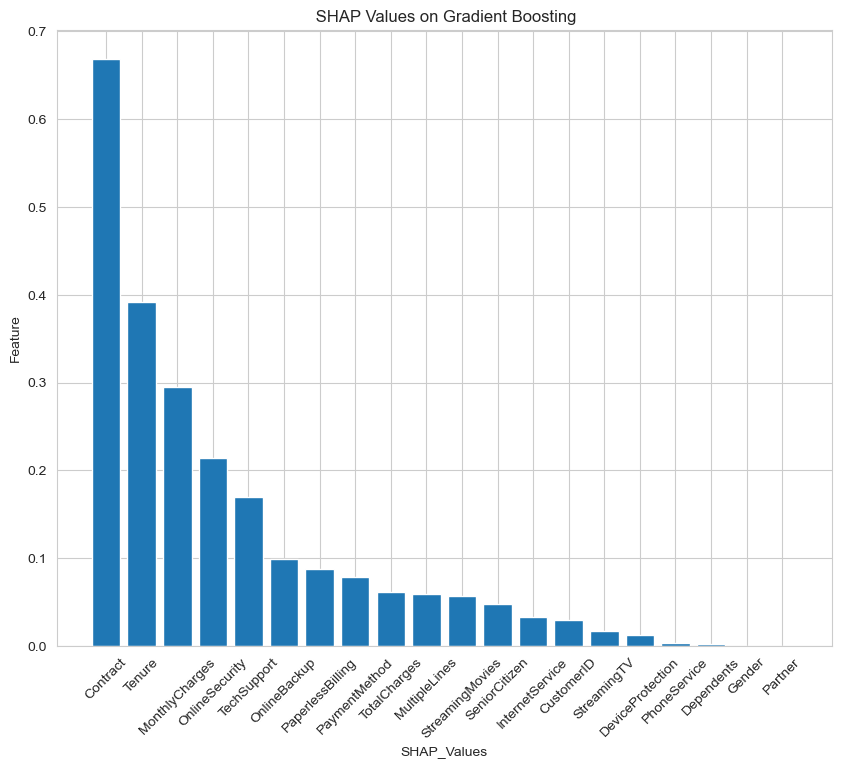

In [534]:
plt.figure(figsize=(10,8))
plt.bar(shap_values['Feature'], shap_values['SHAP_Values'])
plt.title(' SHAP Values on Gradient Boosting')
plt.xlabel('SHAP_Values')
plt.xticks(rotation=45)
plt.ylabel("Feature")

In [546]:
shap_values[shap_values['SHAP_Values'] >0.1]

,Feature,SHAP_Values
15,Contract,0.668120
5,Tenure,0.391386
18,MonthlyCharges,0.295258
9,OnlineSecurity,0.214589
12,TechSupport,0.169225


In [47]:
important_features_gb = []
for i,rows in shap_values.iterrows():
    if rows['SHAP_Values'] > 0.1:
        important_features_gb.append(rows['Feature'])

important_features_gb

['Contract', 'Tenure', 'MonthlyCharges', 'OnlineSecurity', 'TechSupport']

In [49]:
filtered_X_train_gb = X_train[important_features_gb].reset_index(drop = True)
filtered_X_test_gb = X_test[important_features_gb].reset_index(drop = True)

In [411]:
filtered_X_train_gb

,Contract,Tenure,MonthlyCharges,OnlineSecurity,TechSupport
0,1,21,64.85,2,0
1,2,54,97.20,0,0
2,0,1,23.45,0,0
3,0,4,70.20,0,0
4,2,0,61.90,2,2
...,...,...,...,...,...
5629,0,1,95.00,2,0
5630,2,23,91.10,2,2
5631,0,12,21.15,1,1
5632,0,12,99.45,0,0


In [485]:
evaluate_model(best_params_gb,filtered_X_train_gb,y_train,filtered_X_test_gb,y_test)

Results for GradientBoostingClassifier:
Accuracy: 0.808374733853797
Precision: 0.7978351171980657
Recall: 0.808374733853797
F1 Score: 0.7979543199403281
ROC AUC: 0.8619639363607191




# Second GridSearchCV (Final)

## LogisticRegression

In [66]:
grid_search_lr.fit(filtered_X_train_lr, y_train)
grid_search_lr.best_params_

{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}

In [502]:
best_params_lr_2 = grid_search_lr.best_params_
best_params_lr_2

{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}

In [72]:
best_params_lr_2.fit(filtered_X_train_lr, y_train)

LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

In [51]:
best_params_lr_2 = LogisticRegression(C = 0.1, penalty = 'l1', solver= 'liblinear')

In [68]:
evaluate_model(best_params_lr_2,filtered_X_train_lr,y_train,filtered_X_test_lr,y_test)

Results for LogisticRegression:
Accuracy: 0.8161816891412349
Precision: 0.8078757709200355
Recall: 0.8161816891412349
F1 Score: 0.8093402560383558
ROC AUC: 0.8613635657871582




## GradientBoosting

In [492]:
grid_search_gb.fit(filtered_X_train_gb, y_train)
best_params_gb_2 = grid_search_gb.best_params_

In [53]:
#best_params_gb_2 = grid_search_gb.best_params_
best_params_gb_2 = GradientBoostingClassifier(learning_rate = 0.01, max_depth = 5, min_samples_leaf = 2, min_samples_split = 2,n_estimators =300)

In [512]:
evaluate_model(best_params_gb_2,filtered_X_train_gb,y_train,filtered_X_test_gb,y_test)

Results for GradientBoostingClassifier:
Accuracy: 0.8147622427253371
Precision: 0.8055464367750796
Recall: 0.8147622427253371
F1 Score: 0.8062670746972487
ROC AUC: 0.8616818657033133




# Final Model - Logistic Regression

In [80]:
final_predictions = best_params_lr_2.predict(filtered_X_test_lr)

In [90]:
final_predictions

array([0, 0, 0, ..., 0, 0, 0])